In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None

In [53]:
data = pd.read_csv('medical_clean.csv')

In [54]:
data

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,item1,item2,item3,item4,item5,item6,item7,item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93000,Divorced,Male,No,19.14147,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.58577,3726.70286,17939.40342,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99000,Married,Female,No,18.94035,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.12956,4193.19046,17612.99812,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14000,Widowed,Female,No,18.05751,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.77218,2434.23422,17505.19246,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49000,Married,Male,No,16.57686,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.71488,2127.83042,12993.43735,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56000,Widowed,Female,No,17.43907,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.25481,2113.07327,3716.52579,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",2,25,45967.61000,Widowed,Male,No,16.98086,4,2,1,No,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous,51.56122,6850.94200,8927.64200,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4,87,14983.02000,Widowed,Male,Yes,18.17702,5,0,0,No,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan,68.66824,7741.69000,28507.15000,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3,45,65917.81000,Separated,Female,Yes,17.12907,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.15418,8276.48100,15281.21000,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,271,Rural,America/Denver,Outdoor activities/education manager,3,43,29702.32000,Divorced,Male,Yes,19.91043,5,2,1,No,Emergency Admission,No,No,Medium,Yes,No,No,No,Yes,No,No,No,No,Blood Work,63.35690,7644.48300,7781.67800,5,5,3,4,4,3,4,3


In [55]:
clean_data = data.drop(columns=['CaseOrder','Customer_id','Interaction','UID','City','County','Zip','Lat','Lng','Population','TimeZone','Job'])

In [56]:
cat_columns = clean_data.select_dtypes(['object']).columns
clean_data[cat_columns] = clean_data[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [57]:
clean_data

,State,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,item1,item2,item3,item4,item5,item6,item7,item8
0,0,0,1,53,86575.93000,0,0,0,19.14147,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.58577,3726.70286,17939.40342,3,3,2,2,4,3,3,4
1,1,1,3,51,46805.99000,1,1,0,18.94035,4,2,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,15.12956,4193.19046,17612.99812,3,4,3,4,4,4,3,3
2,2,0,3,53,14370.14000,2,1,0,18.05751,4,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,0,4.77218,2434.23422,17505.19246,2,4,4,4,3,4,3,3
3,3,0,0,78,39741.49000,1,0,0,16.57686,4,1,0,0,1,1,1,0,0,0,1,0,1,1,1,1,0,0,1.71488,2127.83042,12993.43735,3,5,5,3,4,5,5,5
4,4,2,1,22,1209.56000,2,1,0,17.43907,5,0,2,1,1,1,0,2,0,1,1,1,1,1,0,0,1,2,1.25481,2113.07327,3716.52579,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,31,1,2,25,45967.61000,2,0,0,16.98086,4,2,1,0,0,0,0,0,0,1,1,0,1,0,1,1,1,1,51.56122,6850.94200,8927.64200,3,2,2,3,4,3,4,2
9996,37,1,4,87,14983.02000,2,0,1,18.17702,5,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,2,68.66824,7741.69000,28507.15000,3,3,4,2,5,3,4,4
9997,33,2,3,45,65917.81000,4,1,1,17.12907,4,2,0,1,1,0,0,1,1,1,1,0,1,0,0,0,1,1,70.15418,8276.48100,15281.21000,3,3,3,4,4,2,3,2
9998,2,2,3,43,29702.32000,0,0,1,19.91043,5,2,1,0,0,1,0,0,1,1,1,0,0,1,1,0,1,0,63.35690,7644.48300,7781.67800,5,5,3,4,4,3,4,3


In [58]:
X = clean_data.iloc[:,[6,1]]

<AxesSubplot:xlabel='ReAdmis', ylabel='vitD_supp'>

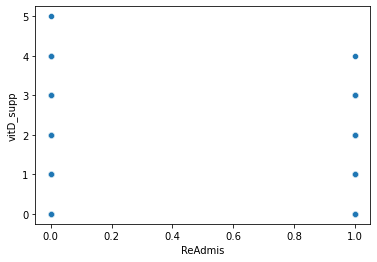

In [63]:
sns.scatterplot(data=clean_data, x='ReAdmis', y='vitD_supp')

In [19]:
X_scaled = preprocessing.scale(X)

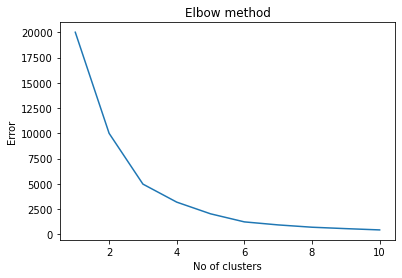

In [20]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X_scaled)
    kmeans.fit(X_scaled)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [28]:
kmeans = KMeans(2)

In [29]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [30]:
clusters = X.copy()

In [31]:
clusters['cluster_pred']=kmeans.fit_predict(X)

In [32]:
clusters

,ReAdmis,Children,cluster_pred
0,0,1,1
1,0,3,0
2,0,3,0
3,0,0,1
4,0,1,1
...,...,...,...
9995,0,2,1
9996,1,4,0
9997,1,3,0
9998,1,3,0


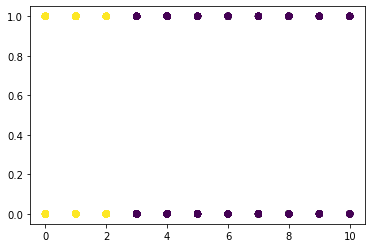

In [33]:
plt.scatter(clusters['Children'],clusters['ReAdmis'],c=clusters['cluster_pred'])

In [16]:
kmeans_new = KMeans(3)
kmeans.fit(X_scaled)
cluster_new=X.copy()
cluster_new['cluster_pred']=kmeans_new.fit_predict(X_scaled)
cluster_new

,Area,item4,cluster_pred
0,0,2,1
1,1,4,2
2,0,4,1
3,0,3,1
4,2,3,0
...,...,...,...
9995,1,3,0
9996,1,2,0
9997,2,4,0
9998,2,4,0


In [17]:
cluster_new

,Area,item4,cluster_pred
0,0,2,1
1,1,4,2
2,0,4,1
3,0,3,1
4,2,3,0
...,...,...,...
9995,1,3,0
9996,1,2,0
9997,2,4,0
9998,2,4,0


In [18]:
corr = clean_data.corr()

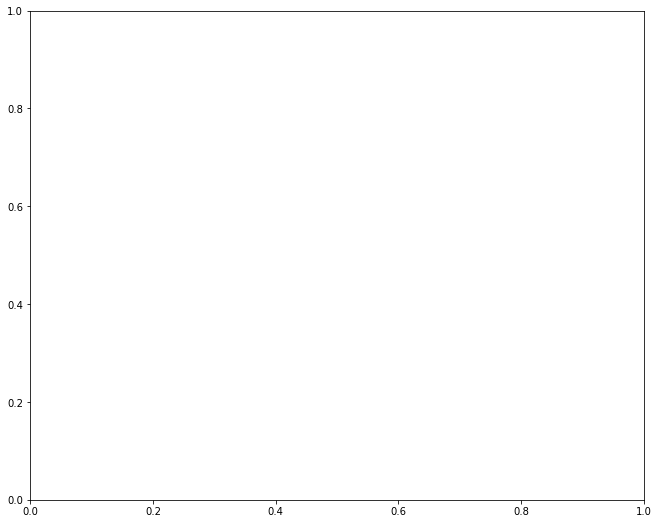

In [20]:
f, ax = plt.subplots(figsize=(11, 9))

<AxesSubplot:>

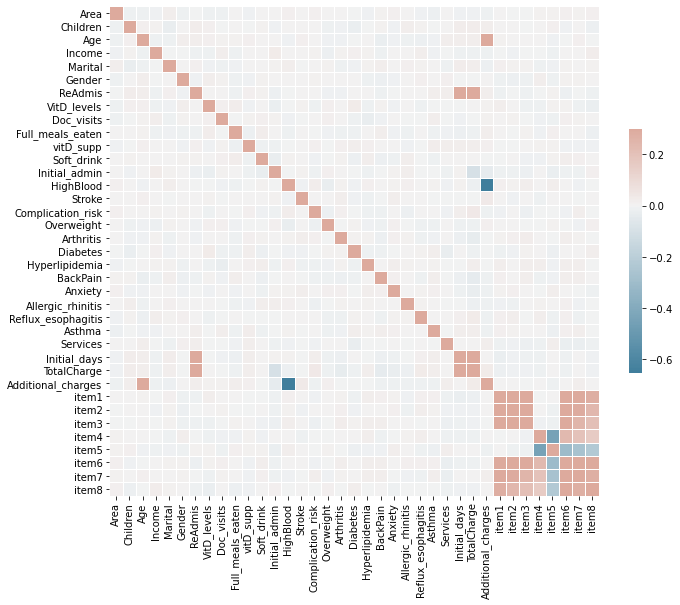

In [23]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})